# Heart Failure Prediction Based on Various Classification Models

### Import Libraries and Modules

In [1]:
# Helper packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textwrap import wrap
import pickle

#visual package
import seaborn as sns

# Scikit-learn package for logistic regression.
from sklearn import linear_model

# Model set up and tuning packages from scikit-learn.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

# Scikit-learn package for data preprocessing.
from sklearn import preprocessing

# Scikit-learn packages for evaluating model performance.
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Random forests and boosting packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

sns.set_style("white")
sns.set(font_scale=2)

In [2]:
from pathlib import Path

In [3]:
Path.cwd()

WindowsPath('C:/Users/597154/Documents/GitHub/bah-intermediate/Capstone')

### Load Data File

In [4]:
data_dir = Path.cwd()
df = pd.read_csv(data_dir / "heart_failure_clinical_records_dataset.csv" )

## Data Exploration

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Feature Descriptions
- Age - Age of patient
- Anaemia - 0 = No, 1 = Yes
- Creatinine_phosphokinase - Level of CPK enzyme in blood (mcg/L)
- Diabetes - 0 = No, 1 = Yes
- Ejection_fraction - percentage of blood leaving
- High_blood_pressure - 0 = No, 1 = Yes
- Platelets - Number of platelets in blood
- Serum_creatinine - level of creatinine in blood (mg/dL)
- Serum_sodium - level of sodium in blood (mEq/L)
- Sex - Gender of patient Male = 1, Female = 0
- Smoking - 0 = No, 1 = Yes
- Time - follow-up period in days
- DEATH_EVENT - 0 = No, 1 = Yes

In [6]:
df.shape

(299, 13)

In [7]:
pd.options.display.float_format = "{:.2f}".format
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,0.43,581.84,0.42,38.08,0.35,263358.03,1.39,136.63,0.65,0.32,130.26,0.32
std,11.89,0.50,970.29,0.49,11.83,0.48,97804.24,1.03,4.41,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,113.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,140.00,1.00,1.00,203.00,1.00
max,95.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,148.00,1.00,1.00,285.00,1.00


In [8]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

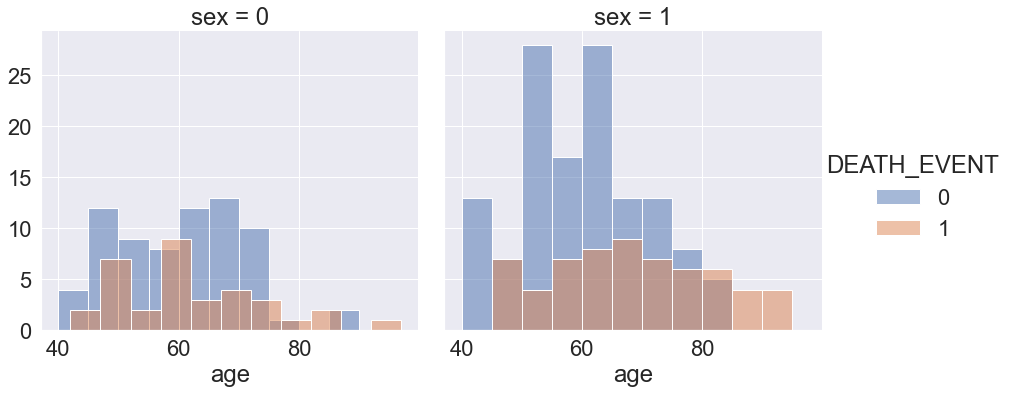

In [9]:

sns.set_style("white")
sns.set(font_scale=2)
fg = sns.FacetGrid(df, col="sex", hue="DEATH_EVENT", height=6, aspect=1, despine=True)
fg.map_dataframe(sns.histplot, "age", alpha=.5, binwidth=5)
fg.add_legend();

#Male=1, female=0

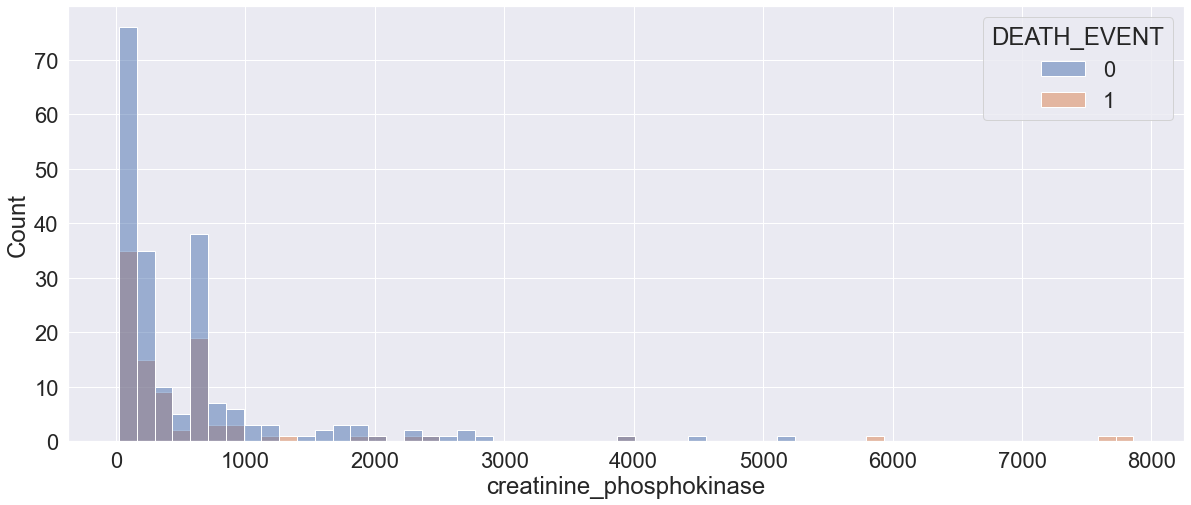

In [10]:

plt.figure(figsize=(20, 8))
sns.histplot(data=df, x="creatinine_phosphokinase", hue="DEATH_EVENT");

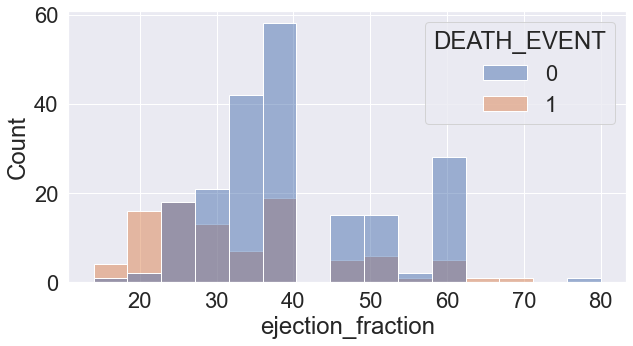

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="ejection_fraction", hue="DEATH_EVENT");

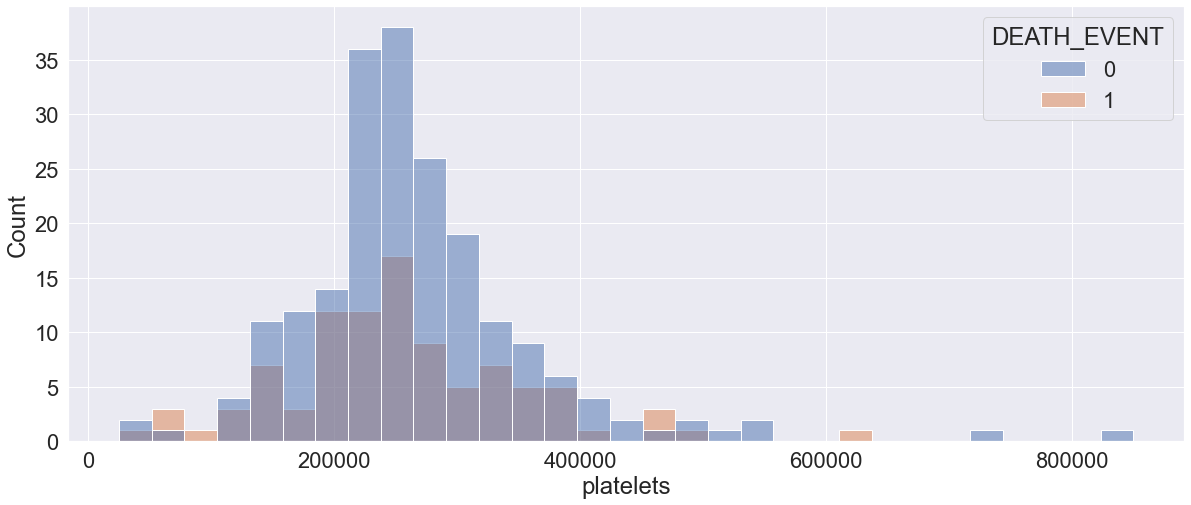

In [12]:
plt.figure(figsize=(20, 8))
sns.histplot(data=df, x="platelets", hue="DEATH_EVENT");

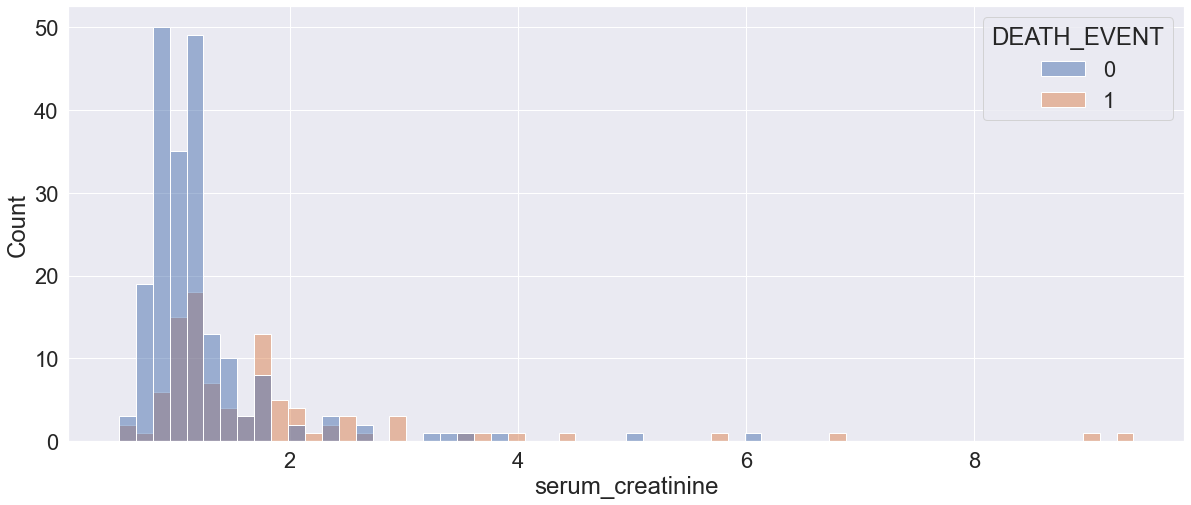

In [13]:
plt.figure(figsize=(20, 8))
sns.histplot(data=df, x="serum_creatinine", hue="DEATH_EVENT");

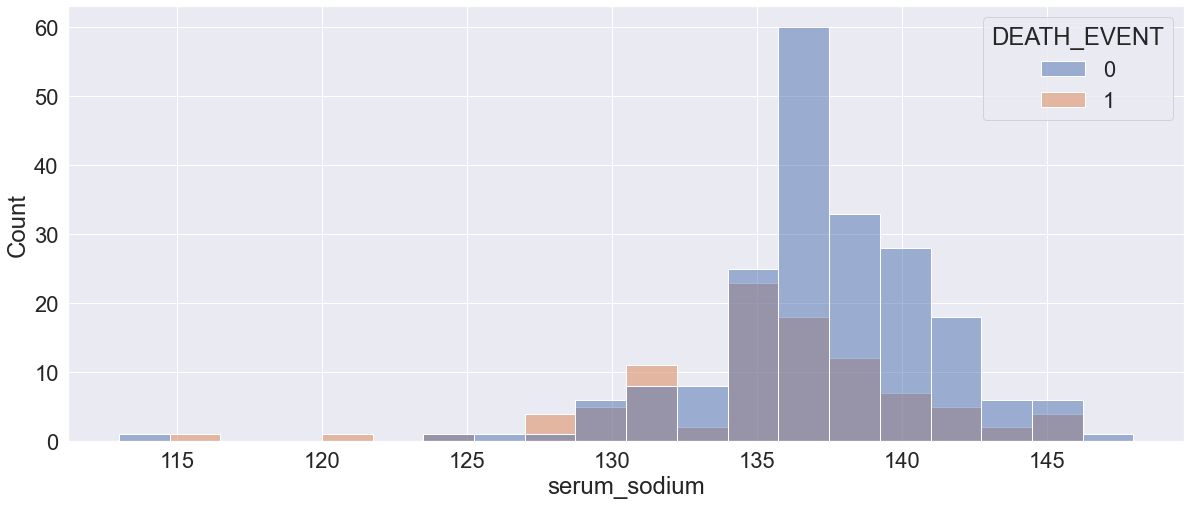

In [14]:
plt.figure(figsize=(20, 8))
sns.histplot(data=df, x="serum_sodium", hue="DEATH_EVENT");

''

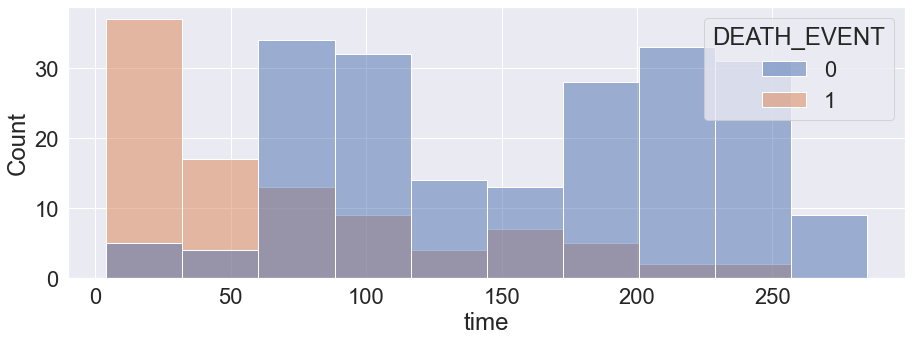

In [15]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x="time", hue="DEATH_EVENT")
#plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0);
;

### Diabetes - No=0, Yes=1

<Figure size 432x288 with 0 Axes>

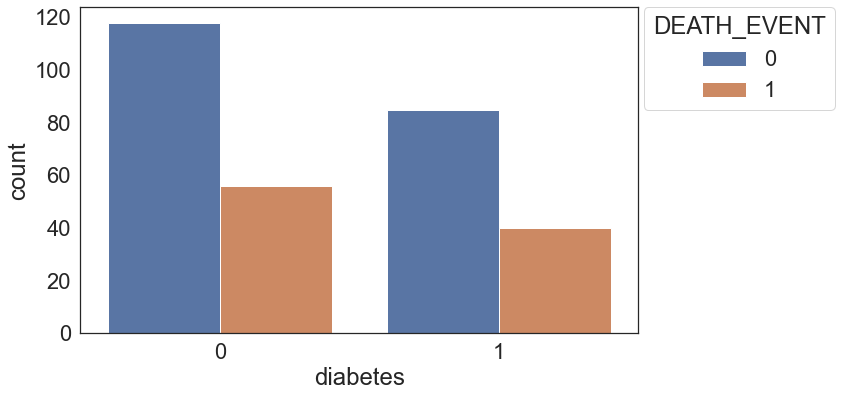

In [16]:
sns.set_style("white")
sns.despine()
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="diabetes", hue="DEATH_EVENT")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., title="DEATH_EVENT" );


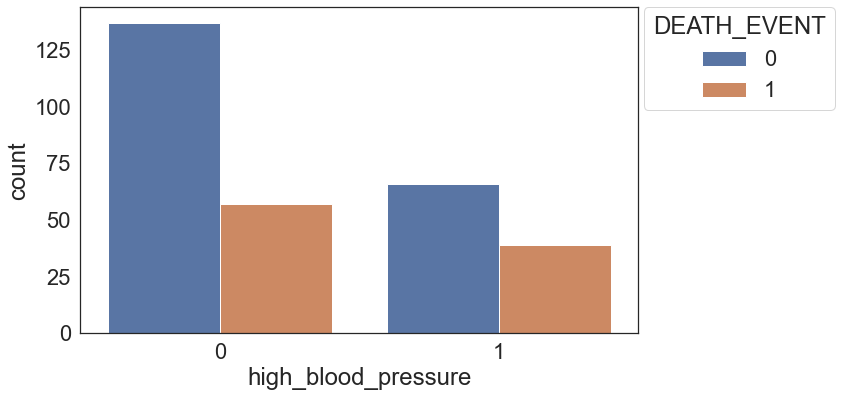

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="high_blood_pressure", hue="DEATH_EVENT")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., title="DEATH_EVENT" );


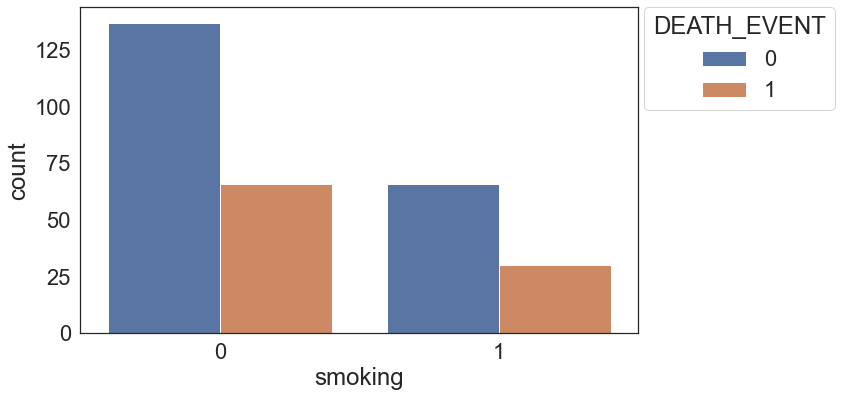

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="smoking", hue="DEATH_EVENT")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., title="DEATH_EVENT" );


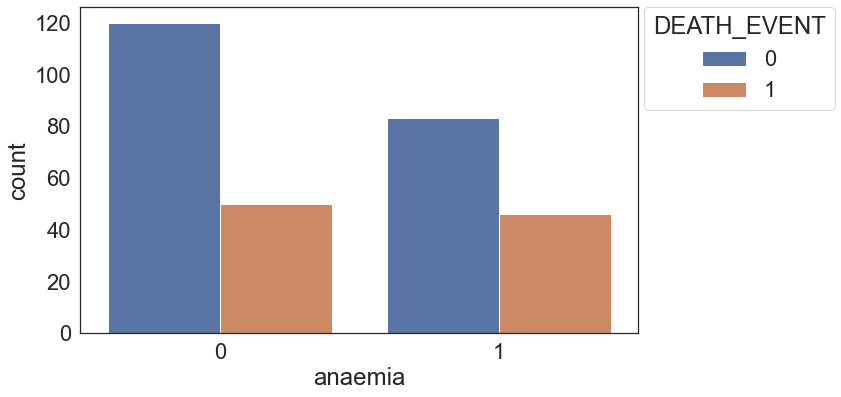

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="anaemia", hue="DEATH_EVENT")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., title="DEATH_EVENT" );

#### Rename target variable to easier label

In [20]:
df = df.rename(columns = {'DEATH_EVENT' : 'DEATH'})
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH
0,75.00,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.00,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.00,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.00,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.00,1,160,1,20,0,327000.00,2.70,116,0,0,8,1


#### Check frequency of target variable

In [21]:
df['DEATH'].value_counts()

0    203
1     96
Name: DEATH, dtype: int64

203 patients survived  
96 patients died- 32%  

#### Check for null values

In [22]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH                       0
dtype: int64

No missing data values

### Correlation Heatmap

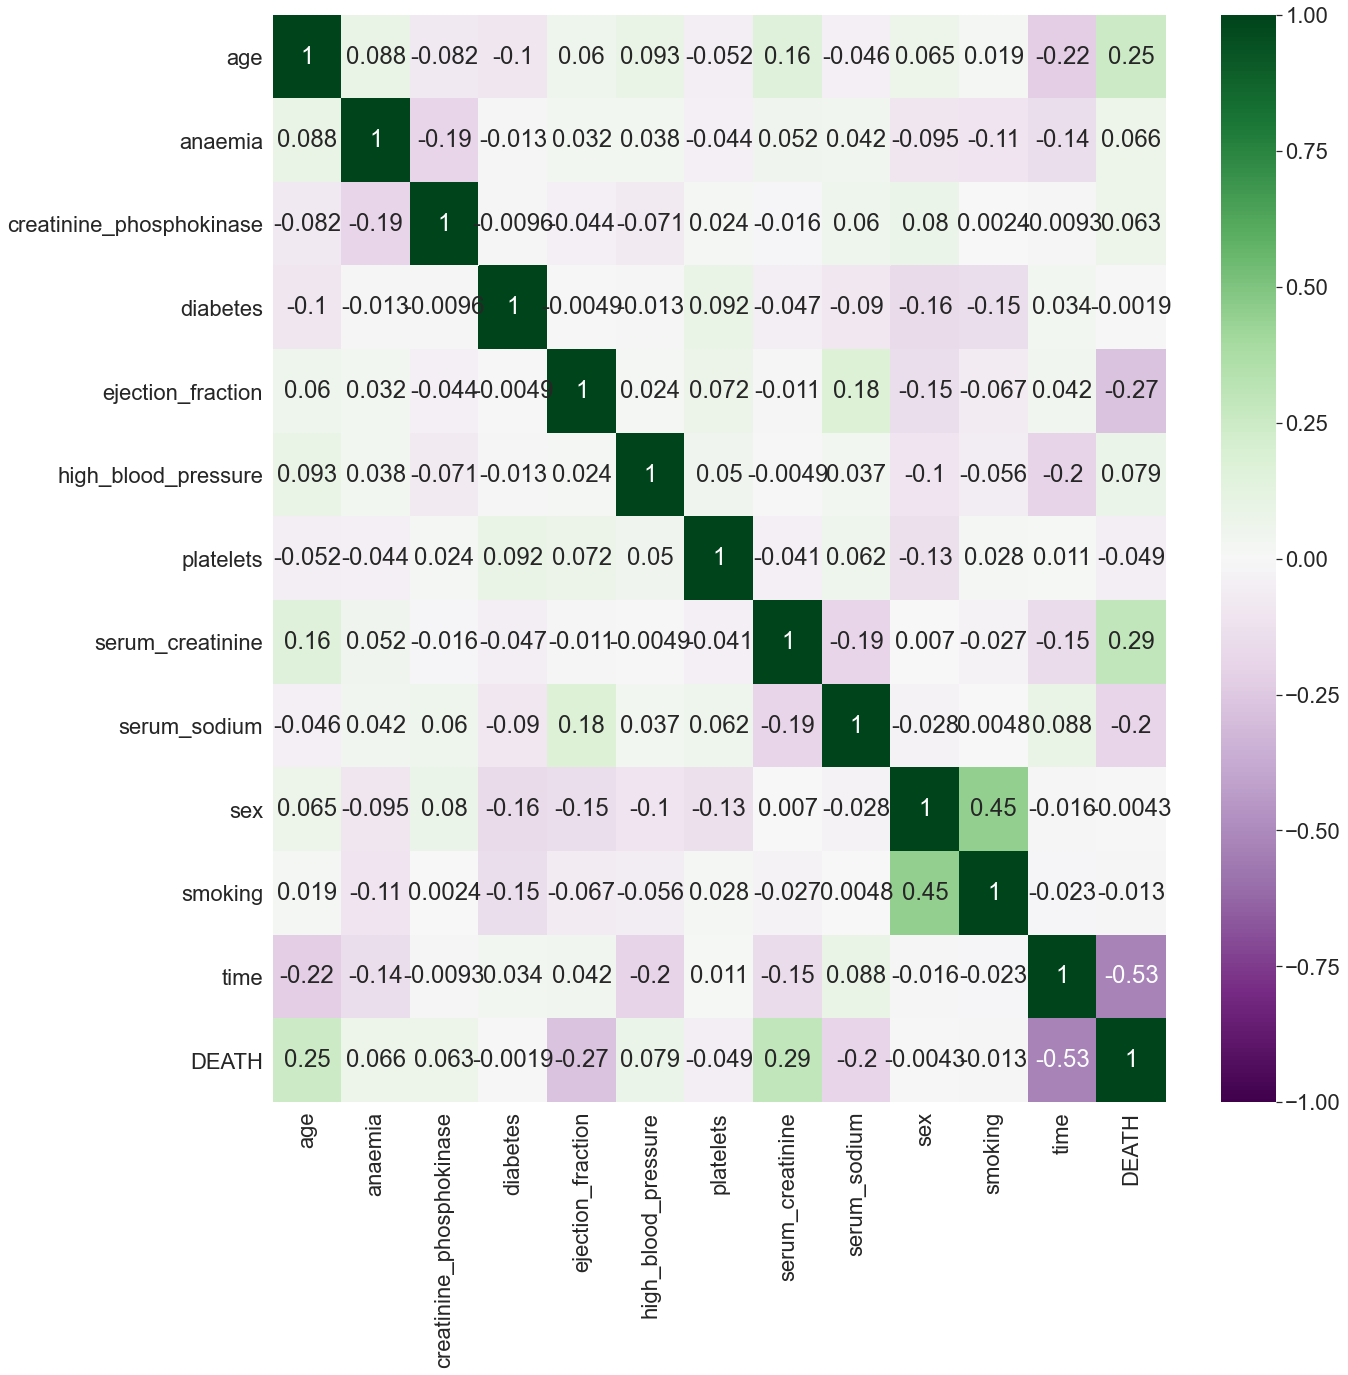

In [23]:
sns.set(font_scale=2)
correl = df.corr()
ax, fig = plt.subplots(figsize=(20,20))
sns.heatmap(correl, vmin=-1, cmap='PRGn', annot=True)
plt.show()

In [24]:
correl[abs(correl['DEATH']) > 0.1]['DEATH']

age                  0.25
ejection_fraction   -0.27
serum_creatinine     0.29
serum_sodium        -0.20
time                -0.53
DEATH                1.00
Name: DEATH, dtype: float64

Features age, ejection_fraction, serum_creatinine, serum_sodium and time all have significant correlation with heart failure

### Feature Selection

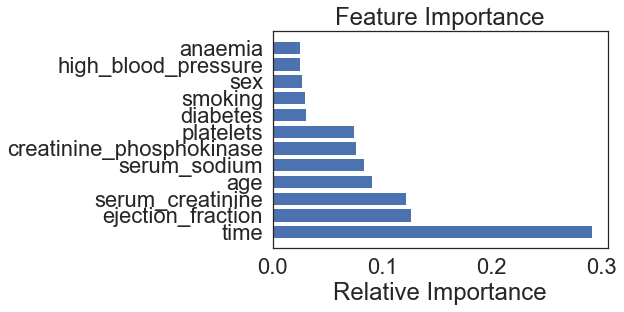

In [25]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

from sklearn.ensemble import ExtraTreesClassifier
sns.set_style("white")

etc = ExtraTreesClassifier()
etc.fit(X,y)
 
features = X.columns
importances = etc.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(1)
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
labels = features[indices]
labels = [ '\n'.join(wrap(l,13)) for l in labels ]
plt.yticks(range(len(indices)), features[indices]);




Age, serum_creatinine, ejection_fraction and time have the highest feature importance

### Prep Target Variable



Convert target variable to bool so it is binary class

In [26]:
df["DEATH"] = np.where(df["DEATH"] == 1, True, False)
df.DEATH.dtypes

dtype('bool')

## Data Modeling

### Train Test Split

In [27]:
#subset data with the 5 features listed above with high correlations to death and high feature importance

df_subset1 = df[["age", "ejection_fraction", "serum_creatinine","serum_sodium", "time", "DEATH"]]
df_subset1.head()

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH
0,75.00,20,1.90,130,4,True
1,55.00,38,1.10,136,6,True
2,65.00,20,1.30,129,7,True
3,50.00,20,1.90,137,7,True
4,65.00,20,2.70,116,8,True


In [28]:
X = df_subset1[["age", "ejection_fraction", "serum_creatinine","serum_sodium", "time"]]
y = np.array(df_subset1["DEATH"])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=1)

### Logistic Regression

In [29]:
#set up logistic regression model 
lrm = linear_model.LogisticRegression()
#fit model to training data
lrm.fit(X_train,y_train)

LogisticRegression()

In [30]:
#predict on test data
predicted_values = lrm.predict(X_test)
predicted_probabilities = lrm.predict_proba(X_test)


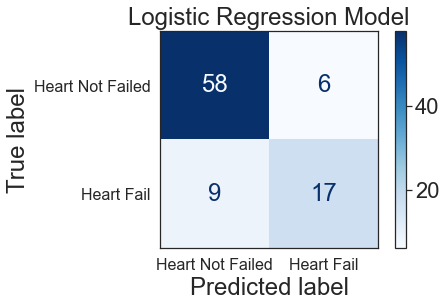

In [31]:
#test data confusion matrix

metrics.plot_confusion_matrix(lrm, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"],fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"],fontsize=16);

In [32]:
#compute test model accuracy score
test_accuracy_score = metrics.accuracy_score(y_test, predicted_values)
print("Accuracy on test data: ", test_accuracy_score)

Accuracy on test data:  0.8333333333333334


In [33]:
trained_accuracy_score = lrm.score(X_train, y_train)
print("Accuracy on train data: " , trained_accuracy_score)

Accuracy on train data:  0.8516746411483254


In [34]:
target_names = ['DEATH_0', 'DEATH_1']
class_report = metrics.classification_report(y_test,
                                            predicted_values,
                                            target_names = target_names)
print(class_report)


              precision    recall  f1-score   support

     DEATH_0       0.87      0.91      0.89        64
     DEATH_1       0.74      0.65      0.69        26

    accuracy                           0.83        90
   macro avg       0.80      0.78      0.79        90
weighted avg       0.83      0.83      0.83        90



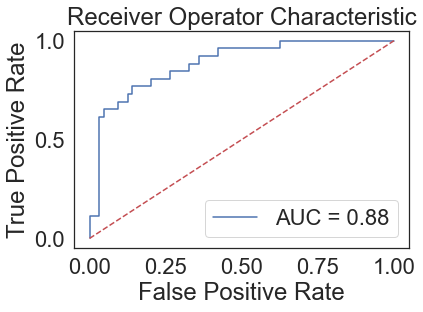

In [35]:
#get probabilities instead of predicted values
test_predictions = predicted_probabilities[:, 1]
# Get FPR, TPR, and threshold values.
fpr, tpr, threshold = metrics.roc_curve(y_test,            
                                        test_predictions)  

# Get AUC by providing the FPR and TPR.
auc = metrics.auc(fpr, tpr)

#Make ROC plot
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [36]:
model_final_dict = {'metrics': ["accuracy"],
'values':[round(test_accuracy_score, 4)],
'model':['logistic']}

model_final = pd.DataFrame(data = model_final_dict)
print(model_final)

    metrics  values     model
0  accuracy    0.83  logistic


### Logistic Regression with Age as Categorical

In [37]:
df['age'] = np.where(df['age'] <= 51, "40-50",
                     np.where((df['age'] > 51) & (df['age'] <= 60), '52-60', 
                              np.where(df['age'] <= 70, '61-70',
                                       '71+'
                                      )
                             )
                    )



In [38]:
df2 = pd.get_dummies(df, columns=['age'], drop_first=True)
df2.columns

Index(['anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
       'sex', 'smoking', 'time', 'DEATH', 'age_52-60', 'age_61-70', 'age_71+'],
      dtype='object')

In [39]:
df2_subset = df2[["ejection_fraction", "serum_creatinine","serum_sodium", "time","age_52-60", 'age_61-70', 'age_71+', 'DEATH']]
X = df2_subset[["age_52-60", 'age_61-70', 'age_71+', "ejection_fraction", "serum_creatinine","serum_sodium", "time"]]
y = np.array(df2_subset["DEATH"])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=1)

In [40]:
#set up logistic regression model 
lrm = linear_model.LogisticRegression()
#fit model to training data
lrm.fit(X_train,y_train);

C:\Users\597154\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
predicted_values = lrm.predict(X_test)
predicted_probabilities = lrm.predict_proba(X_test)

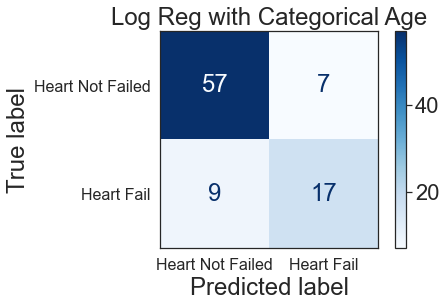

In [42]:
#test data confusion matrix

metrics.plot_confusion_matrix(lrm, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Log Reg with Categorical Age")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"],fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"],fontsize=16);

In [43]:
#compute test model accuracy score
test_accuracy_score = metrics.accuracy_score(y_test, predicted_values)
print("Accuracy on test data: ", test_accuracy_score)

Accuracy on test data:  0.8222222222222222


In [44]:
trained_accuracy_score = lrm.score(X_train, y_train)
print("Accuracy on train data: " , trained_accuracy_score)

Accuracy on train data:  0.8373205741626795


In [45]:
model_final = model_final.append({'metrics': "accuracy",
                                  'values': round(test_accuracy_score, 4),
                                  'model':'logistic-age categorical'},
                                  ignore_index=True
                                   )

print(model_final)

    metrics  values                     model
0  accuracy    0.83                  logistic
1  accuracy    0.82  logistic-age categorical


### Logistical Regression - Drop Time
#### Features: ejection_fraction, serum_creatinine, serum_sodium

In [46]:
X = df2_subset[["ejection_fraction", "serum_creatinine","serum_sodium"]]
y = np.array(df2_subset["DEATH"])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=1)

In [47]:
#set up logistic regression model 
lrm = linear_model.LogisticRegression(solver='liblinear')
#fit model to training data
lrm.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [48]:
predicted_values = lrm.predict(X_test)
predicted_probabilities = lrm.predict_proba(X_test)

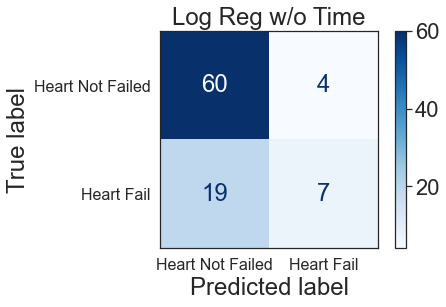

In [49]:
#test data confusion matrix
metrics.plot_confusion_matrix(lrm, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Log Reg w/o Time")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"],fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"],fontsize=16);

In [50]:
#compute test model accuracy score
test_accuracy_score = metrics.accuracy_score(y_test, predicted_values)
print("Accuracy on test data: ", test_accuracy_score)

Accuracy on test data:  0.7444444444444445


In [51]:
trained_accuracy_score = lrm.score(X_train, y_train)
print("Accuracy on train data: " , trained_accuracy_score)

Accuracy on train data:  0.7464114832535885


In [52]:
model_final = model_final.append({'metrics': "accuracy",
                                  'values': round(test_accuracy_score, 4),
                                  'model':'logistic-drop time'},
                                  ignore_index=True
                                   )

print(model_final)

    metrics  values                     model
0  accuracy    0.83                  logistic
1  accuracy    0.82  logistic-age categorical
2  accuracy    0.74        logistic-drop time


### Logistical Regression - Drop Serum_sodium
#### Features: ejection_fraction, serum_creatinine, time

In [53]:
X = df2_subset[["ejection_fraction", "serum_creatinine","time"]]
y = np.array(df2_subset["DEATH"])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=1)

In [54]:
#set up logistic regression model 
lrm = linear_model.LogisticRegression(solver='liblinear')
#fit model to training data
lrm.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [55]:
predicted_values = lrm.predict(X_test)
predicted_probabilities = lrm.predict_proba(X_test)

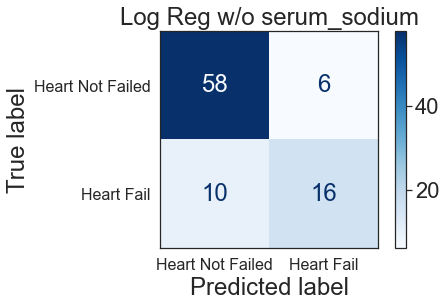

In [56]:
#test data confusion matrix
metrics.plot_confusion_matrix(lrm, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Log Reg w/o serum_sodium")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"],fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"],fontsize=16);

In [57]:
#compute test model accuracy score
test_accuracy_score = metrics.accuracy_score(y_test, predicted_values)
print("Accuracy on test data: ", test_accuracy_score)

Accuracy on test data:  0.8222222222222222


In [58]:
trained_accuracy_score = lrm.score(X_train, y_train)
print("Accuracy on train data: " , trained_accuracy_score)

Accuracy on train data:  0.8373205741626795


In [59]:
model_final = model_final.append({'metrics': "accuracy",
                                  'values': round(test_accuracy_score, 4),
                                  'model':'logistic-drop sodium'},
                                  ignore_index=True
                                   )

print(model_final)

    metrics  values                     model
0  accuracy    0.83                  logistic
1  accuracy    0.82  logistic-age categorical
2  accuracy    0.74        logistic-drop time
3  accuracy    0.82      logistic-drop sodium


### Logistic Regression - Drop Age
#### Features: ejection_fraction, serum_creatinine, serum_sodium, time

In [60]:
X = df2_subset[["ejection_fraction", "serum_creatinine","serum_sodium", "time"]]
y = np.array(df2_subset["DEATH"])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=1)

In [61]:
#set up logistic regression model 
lrm = linear_model.LogisticRegression()
#fit model to training data
lrm.fit(X_train,y_train)

LogisticRegression()

In [62]:
predicted_values = lrm.predict(X_test)
predicted_probabilities = lrm.predict_proba(X_test)

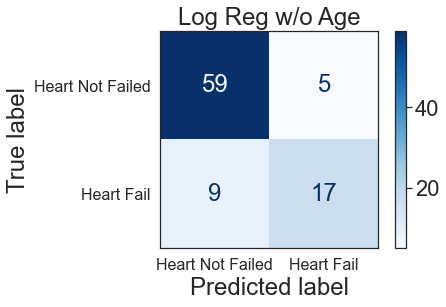

In [63]:
#test data confusion matrix
metrics.plot_confusion_matrix(lrm, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Log Reg w/o Age")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"],fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"],fontsize=16);

In [64]:
#compute test model accuracy score
test_accuracy_score = metrics.accuracy_score(y_test, predicted_values)
print("Accuracy on test data: ", test_accuracy_score)

Accuracy on test data:  0.8444444444444444


In [65]:
trained_accuracy_score = lrm.score(X_train, y_train)
print("Accuracy on train data: " , trained_accuracy_score)

Accuracy on train data:  0.8564593301435407


In [66]:
model_final = model_final.append({'metrics': "accuracy",
                                  'values': round(test_accuracy_score, 4),
                                  'model':'logistic-drop age'},
                                  ignore_index=True
                                   )

print(model_final)

    metrics  values                     model
0  accuracy    0.83                  logistic
1  accuracy    0.82  logistic-age categorical
2  accuracy    0.74        logistic-drop time
3  accuracy    0.82      logistic-drop sodium
4  accuracy    0.84         logistic-drop age


### GridSearchCV - Find best hyperparameters
#### Based on features: ejection_fraction, serum_creatinine, serum_sodium and time


In [67]:
# Create regularization penalty space.
penalty = ['l1', 'l2']
# Create regularization constant space.
C = np.logspace(0, 10, 10)

# Create hyperparameter options dictionary.
hyperparameters = dict(C = C, penalty = penalty)


In [68]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

In [69]:
clf = GridSearchCV(
    linear_model.LogisticRegression(solver='liblinear'), #<- function to optimize
    hyperparameters,                   #<- grid search parameters
    cv = kf,                           #<- 10-fold cv ==> REPLACED 10 with kf because cross-validation generator
    verbose = 0
)                       #<- no messages to show
clf.fit(X_train, y_train)


C:\Users\597154\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\597154\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\597154\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\597154\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\597154\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\

C:\Users\597154\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\597154\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\597154\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\597154\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\597154\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10]),
                         'penalty': ['l1', 'l2']})

In [70]:
clf.best_params_

{'C': 1.0, 'penalty': 'l1'}

Best hyperparameters are C=1 (default) and l1, Lasso. 

### Logistical Regression with best hyperparameters
#### features: ejection_fraction, serum_creatinine, serum_sodium and time

In [71]:
X = df2_subset[["ejection_fraction", "serum_creatinine","serum_sodium", "time"]]
y = np.array(df2_subset["DEATH"])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=1)

In [72]:
#set up logistic regression model 
lrm = linear_model.LogisticRegression(C=1, penalty='l1', solver='liblinear')
#fit model to training data
lrm.fit(X_train,y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [73]:
predicted_values = lrm.predict(X_test)
predicted_probabilities = lrm.predict_proba(X_test)

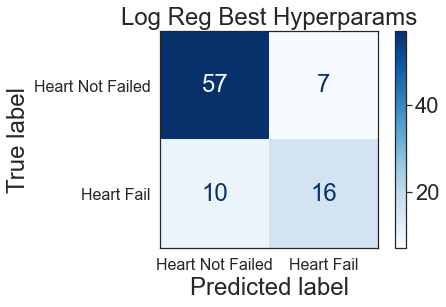

In [74]:
#test data confusion matrix
metrics.plot_confusion_matrix(lrm, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Log Reg Best Hyperparams")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"],fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"],fontsize=16);

In [75]:
#compute test model accuracy score
test_accuracy_score = metrics.accuracy_score(y_test, predicted_values)
print("Accuracy on test data: ", test_accuracy_score)

Accuracy on test data:  0.8111111111111111


In [76]:
trained_accuracy_score = lrm.score(X_train, y_train)
print("Accuracy on train data: " , trained_accuracy_score)

Accuracy on train data:  0.8421052631578947


In [77]:
model_final = model_final.append({'metrics': "accuracy",
                                  'values': round(test_accuracy_score, 4),
                                  'model':'logistic-with best hyperparameters'},
                                  ignore_index=True
                                   )

print(model_final)

    metrics  values                               model
0  accuracy    0.83                            logistic
1  accuracy    0.82            logistic-age categorical
2  accuracy    0.74                  logistic-drop time
3  accuracy    0.82                logistic-drop sodium
4  accuracy    0.84                   logistic-drop age
5  accuracy    0.81  logistic-with best hyperparameters


### Random Forest
#### Features: ejection_fraction, serum_creatinine, serum_sodium, time

In [78]:
X = df2_subset[["ejection_fraction", "serum_creatinine","serum_sodium", "time"]]
y = np.array(df2_subset["DEATH"])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=1)

In [79]:
forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [80]:
# Predict on test data.
y_predict_forest = forest.predict(X_test)

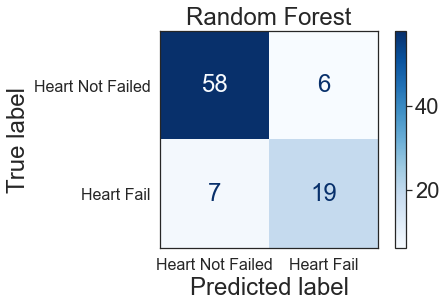

In [81]:
#test data confusion matrix
metrics.plot_confusion_matrix(forest, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Random Forest")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"],fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"],fontsize=16);

In [82]:
test_accuracy_score = metrics.accuracy_score(y_test, y_predict_forest)
print("Accuracy on test data: ", test_accuracy_score)

Accuracy on test data:  0.8555555555555555


In [83]:
trained_accuracy_score = lrm.score(X_train, y_train)
print("Accuracy on train data: " , trained_accuracy_score)

Accuracy on train data:  0.8421052631578947


In [84]:
model_final = model_final.append({'metrics': "accuracy",
                                  'values': round(test_accuracy_score, 4),
                                  'model':'random forest'},
                                  ignore_index=True
                                   )

print(model_final)

    metrics  values                               model
0  accuracy    0.83                            logistic
1  accuracy    0.82            logistic-age categorical
2  accuracy    0.74                  logistic-drop time
3  accuracy    0.82                logistic-drop sodium
4  accuracy    0.84                   logistic-drop age
5  accuracy    0.81  logistic-with best hyperparameters
6  accuracy    0.86                       random forest


Text(0.5, 0, 'Relative Importance')

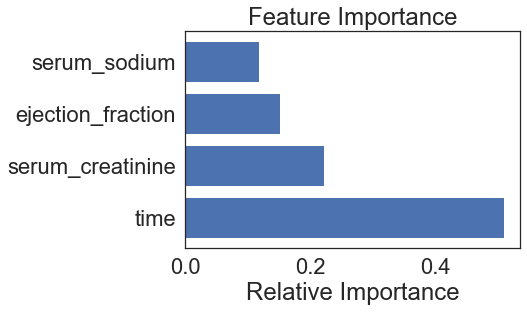

In [85]:
df2_subset_features = df2_subset.drop('DEATH', axis = 1)
features = df2_subset_features.columns
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(1)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
labels = features[indices]
labels = [ '\n'.join(wrap(l,13)) for l in labels ]
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')


### Gradient Boosting

In [86]:
X = df2_subset[["ejection_fraction", "serum_creatinine","serum_sodium", "time"]]
y = np.array(df2_subset["DEATH"])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=1)

In [87]:
gbm = GradientBoostingClassifier(
    n_estimators=200, 
    learning_rate=1, 
    max_depth=2, 
    random_state=1)

gbm.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=2, n_estimators=200,
                           random_state=1)

In [88]:
predicted_values_gbm = gbm.predict(X_test)

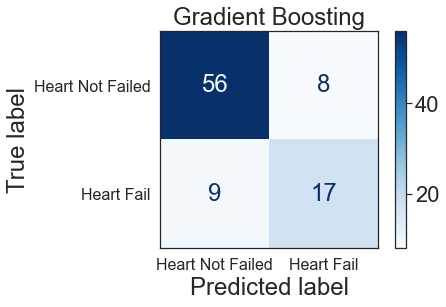

In [89]:
#test data confusion matrix
metrics.plot_confusion_matrix(gbm, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Gradient Boosting")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"],fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"],fontsize=16);

In [90]:
accuracy_gbm = metrics.accuracy_score(y_test, predicted_values_gbm)
print('Accuracy of gbm on test data: ', accuracy_gbm)

Accuracy of gbm on test data:  0.8111111111111111


In [91]:
trained_accuracy_score = lrm.score(X_train, y_train)
print("Accuracy on train data: " , trained_accuracy_score)

Accuracy on train data:  0.8421052631578947


In [92]:
model_final = model_final.append({'metrics': "accuracy",
                                  'values': round(accuracy_gbm, 4),
                                  'model':'gboosting'},
                                  ignore_index=True
                                   )

print(model_final)

    metrics  values                               model
0  accuracy    0.83                            logistic
1  accuracy    0.82            logistic-age categorical
2  accuracy    0.74                  logistic-drop time
3  accuracy    0.82                logistic-drop sodium
4  accuracy    0.84                   logistic-drop age
5  accuracy    0.81  logistic-with best hyperparameters
6  accuracy    0.86                       random forest
7  accuracy    0.81                           gboosting


Text(0.5, 0, 'Relative Importance')

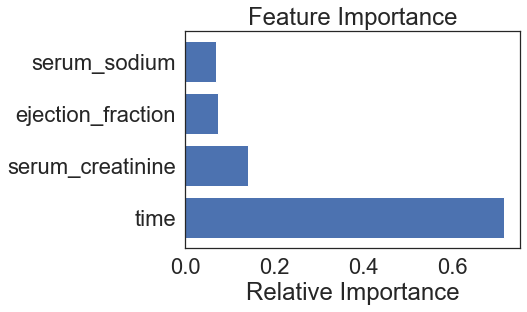

In [93]:
df2_subset_features = df2_subset.drop('DEATH', axis = 1)
features = df2_subset_features.columns
importances = gbm.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(1)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
labels = features[indices]
labels = [ '\n'.join(wrap(l,13)) for l in labels ]
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

### Decision Tree

In [94]:
X = df2_subset[["ejection_fraction", "serum_creatinine","serum_sodium", "time"]]
y = np.array(df2_subset["DEATH"])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=1)

In [95]:
dtc = DecisionTreeClassifier(max_leaf_nodes = 3, random_state=0, criterion='entropy')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3, random_state=0)

In [96]:
predicted_values_dtc = dtc.predict(X_test)

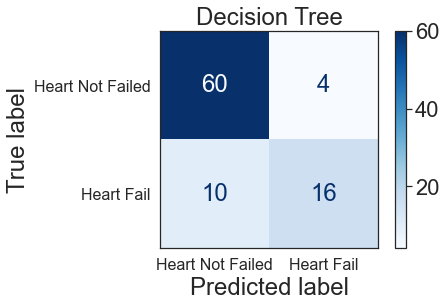

In [97]:
#test data confusion matrix
metrics.plot_confusion_matrix(dtc, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Decision Tree")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"],fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"],fontsize=16);

In [98]:
accuracy_dtc = metrics.accuracy_score(y_test, predicted_values_dtc)
print('Accuracy of dtc on test data: ', accuracy_dtc)

Accuracy of dtc on test data:  0.8444444444444444


In [99]:
trained_accuracy_score = lrm.score(X_train, y_train)
print("Accuracy on train data: " , trained_accuracy_score)

Accuracy on train data:  0.8421052631578947


In [100]:
model_final = model_final.append({'metrics': "accuracy",
                                  'values': round(accuracy_gbm, 4),
                                  'model':'decision tree'},
                                  ignore_index=True
                                   )

print(model_final)

    metrics  values                               model
0  accuracy    0.83                            logistic
1  accuracy    0.82            logistic-age categorical
2  accuracy    0.74                  logistic-drop time
3  accuracy    0.82                logistic-drop sodium
4  accuracy    0.84                   logistic-drop age
5  accuracy    0.81  logistic-with best hyperparameters
6  accuracy    0.86                       random forest
7  accuracy    0.81                           gboosting
8  accuracy    0.81                       decision tree


In [101]:
model_final['values']

0   0.83
1   0.82
2   0.74
3   0.82
4   0.84
5   0.81
6   0.86
7   0.81
8   0.81
Name: values, dtype: float64

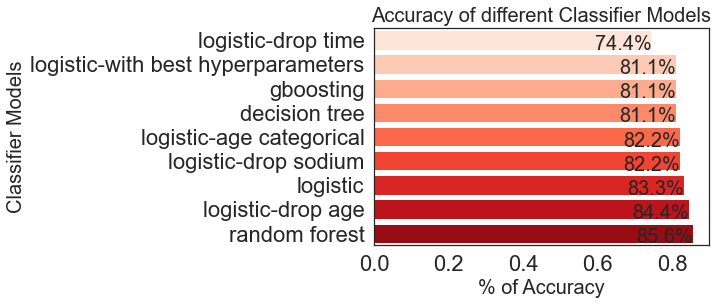

In [102]:
ax = sns.barplot(x=model_final['values'], y=model_final['model'], palette = "Reds", saturation =1.5, order=model_final.sort_values('values').model)
plt.xlabel("% of Accuracy", fontsize = 20 )
plt.ylabel("Classifier Models", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{width:.1%}', (x + width, y +height), ha='right', fontsize = 'small')
plt.show()

## 80-20 Train Test Split
### features: ejection_fraction, serum_creatinine, serum_sodium, time

### Logistic Regression

In [103]:

X = df2_subset[["ejection_fraction", "serum_creatinine", "serum_sodium", "time"]]
y = np.array(df2_subset["DEATH"])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=1)

In [104]:
#set up logistic regression model 
lrm = linear_model.LogisticRegression()
#fit model to training data
lrm.fit(X_train,y_train)

LogisticRegression()

In [105]:
#predict on test data
predicted_values = lrm.predict(X_test)
predicted_probabilities = lrm.predict_proba(X_test)


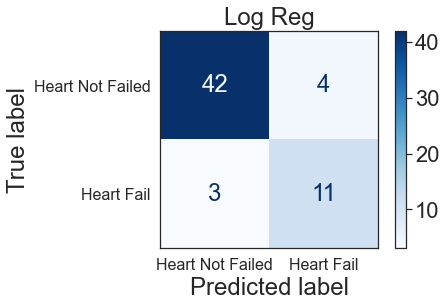

In [106]:
#test data confusion matrix
metrics.plot_confusion_matrix(lrm, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Log Reg")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"],fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"],fontsize=16);

In [107]:
#compute test model accuracy score
test_accuracy_score = metrics.accuracy_score(y_test, predicted_values)
print("Accuracy on test data: ", test_accuracy_score)

Accuracy on test data:  0.8833333333333333


In [108]:
trained_accuracy_score = lrm.score(X_train, y_train)
print("Accuracy on train data: " , trained_accuracy_score)

Accuracy on train data:  0.8326359832635983


### Random Forest

In [109]:
forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [110]:
# Predict on test data.
y_predict_forest = forest.predict(X_test)

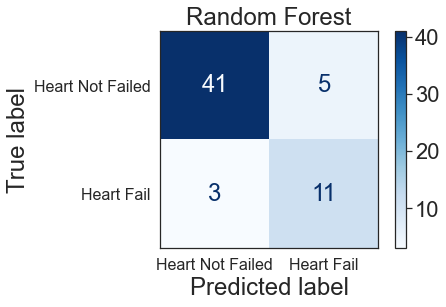

In [111]:
#test data confusion matrix
metrics.plot_confusion_matrix(forest, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Random Forest")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"],fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"],fontsize=16);

In [112]:
test_accuracy_score = metrics.accuracy_score(y_test, y_predict_forest)
print("Accuracy on test data: ", test_accuracy_score)

Accuracy on test data:  0.8666666666666667


In [113]:
trained_accuracy_score = forest.score(X_train, y_train)
print("Accuracy on train data: " , trained_accuracy_score)

Accuracy on train data:  1.0
